In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from highlight_text import fig_text, ax_text
from pyfonts import load_font
import matplotlib.colors as colors

In [6]:
#import shapefiles of pixel counts generated in google earth engine
flood_otsu = gpd.read_file('flooded_vec_newv2.shp')
taluk = gpd.read_file(r"Kerala_Boundaries/Talek Level/Taluk_Level.shp")
                      #'\Kerala_Boundaries\Talek Level\Taluk_Level.shp')
pop_exposed_otsu = gpd.read_file('pop_exposed_vec.shp')

In [7]:
flood_otsu.head()

,count,label,geometry
0,1,1,"POLYGON ((74.92002 12.63491, 74.92002 12.63547..."
1,1,1,"POLYGON ((74.92059 12.63377, 74.92059 12.63434..."
2,6,1,"POLYGON ((74.92115 12.63377, 74.92172 12.63377..."
3,3,1,"POLYGON ((74.92172 12.62981, 74.92172 12.63151..."
4,3,1,"POLYGON ((74.93362 12.60148, 74.93362 12.60318..."


In [8]:
#combine with talek boundaries and aggregate by taluk
union = gpd.overlay(flood_otsu, taluk, how = 'union')
flooded_taluk_otsu = union.dissolve(by = 'name', aggfunc = 'sum')

#tidy for export
flooded_taluk_otsu_ex = flooded_taluk_otsu.rename(columns = {'count':'flood_count'})
flooded_taluk_otsu_ex.pop('label')

name
Adoor             12.0
Alathur           43.0
Aluva            164.0
Ambalappuzha     123.0
Chalakkudy       286.0
                 ...  
Vadakara          79.0
Vaikom           184.0
Varkala            1.0
Vellarikkundu     15.0
Vythiri          158.0
Name: label, Length: 77, dtype: float64

In [9]:
flooded_taluk_otsu_ex.head()

,geometry,flood_count
name,,
Adoor,"POLYGON ((76.64588 9.21544, 76.64576 9.21714, ...",667.0
Alathur,"POLYGON ((76.44361 10.69291, 76.44337 10.69320...",665.0
Aluva,"POLYGON ((76.42180 10.11733, 76.42127 10.11708...",1860.0
Ambalappuzha,"POLYGON ((76.38282 9.31062, 76.38275 9.31078, ...",20908.0
Chalakkudy,"POLYGON ((76.27339 10.18135, 76.27292 10.18398...",3374.0


In [10]:
#same for population exposed counts
union = gpd.overlay(pop_exposed_otsu, taluk, how = 'union')
pop_bytaluk_otsu = union.dissolve(by = 'name', aggfunc = 'sum')

In [11]:
pop_bytaluk_otsu

,geometry,count,label
name,,,
Adoor,"POLYGON ((76.84924 9.10286, 76.85173 9.10142, ...",0.0,0.0
Alathur,"POLYGON ((76.58921 10.72768, 76.59016 10.72739...",0.0,0.0
Aluva,"POLYGON ((76.33510 10.12398, 76.33470 10.12443...",0.0,0.0
Ambalappuzha,"POLYGON ((76.39532 9.35769, 76.39422 9.35570, ...",2160.0,18847.0
Chalakkudy,"POLYGON ((76.31124 10.39259, 76.31183 10.39260...",0.0,0.0
...,...,...,...
Vadakara,"MULTIPOLYGON (((75.54171 11.66295, 75.54144 11...",0.0,0.0
Vaikom,"POLYGON ((76.46077 9.67697, 76.46010 9.67682, ...",3616.0,42553.0
Varkala,"POLYGON ((76.74892 8.70158, 76.74688 8.70536, ...",0.0,0.0


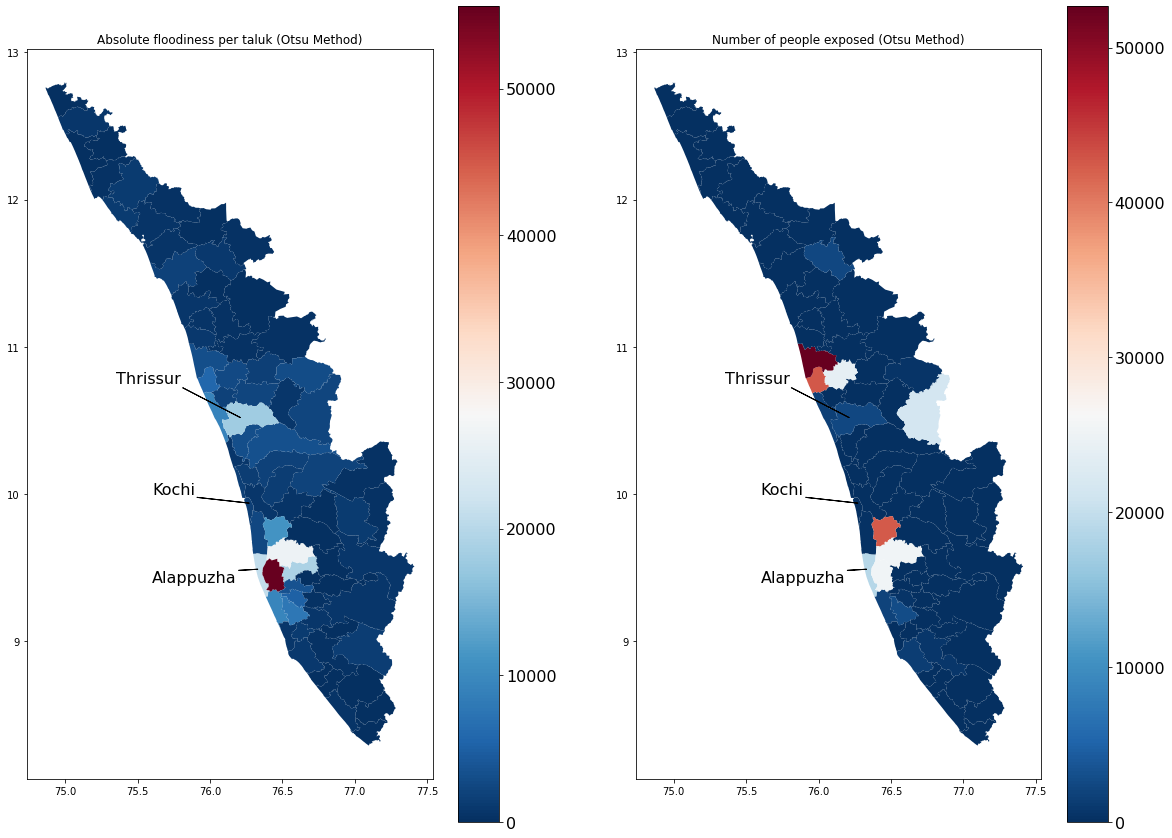

In [12]:
#visualise floodiness and population exposed

fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (20,15))
plt.rcParams['font.size'] = '16'
#flood plot
flooded_taluk_otsu.plot(ax = ax1, column = 'count', legend = True, cmap = 'RdBu_r')
ax1.title.set_text('Absolute floodiness per taluk (Otsu Method)')
ax1.annotate('Kochi',
xy=(76.2705, 9.939), xytext=(75.6, 10), arrowprops=dict(facecolor='black', width = 0.05, headwidth = 0))
ax1.annotate('Alappuzha',
xy=(76.33, 9.49), xytext=(75.6, 9.4), arrowprops=dict(facecolor='black', width = 0.05, headwidth = 0))
ax1.annotate('Thrissur',
xy=(76.21, 10.52), xytext=(75.35, 10.75), arrowprops=dict(facecolor='black', width = 0.05, headwidth = 0))

#population plot
pop_bytaluk_otsu.plot(ax = ax2, column = 'label', legend = True, cmap = 'RdBu_r')
ax2.title.set_text('Number of people exposed (Otsu Method)')
ax2.annotate('Kochi',
xy=(76.2705, 9.939), xytext=(75.6, 10), arrowprops=dict(facecolor='black', width = 0.05, headwidth = 0))
ax2.annotate('Alappuzha',
xy=(76.33, 9.49), xytext=(75.6, 9.4), arrowprops=dict(facecolor='black', width = 0.05, headwidth = 0))
ax2.annotate('Thrissur',
xy=(76.21, 10.52), xytext=(75.35, 10.75), arrowprops=dict(facecolor='black', width = 0.05, headwidth = 0))

plt.show()

In [16]:
#extract top 10 taluks with highest population exposed and tidy for plotting
top_10_taluks = (
    pop_bytaluk_otsu
    .sort_values(by='label', ascending=False)
    .head(10)
    .reset_index(drop=False)
)

top_10_taluks['count'] = top_10_taluks['count'].astype(int) #drop the decimal
top_10_taluks['label'] = top_10_taluks['label'].astype(int)

top_10_taluks = top_10_taluks.sort_values(by='label', ascending=False)

top_10_taluks

,name,geometry,count,label
0,Tirur,"POLYGON ((75.96077 10.83714, 75.96088 10.83622...",1392,52665
1,Ponnani,"POLYGON ((76.00096 10.69364, 76.00073 10.69409...",1456,42750
2,Vaikom,"POLYGON ((76.46077 9.67697, 76.46010 9.67682, ...",3616,42553
3,Kottayam,"POLYGON ((76.49223 9.69497, 76.49304 9.69478, ...",1776,25500
4,Kuttanad,"POLYGON ((76.41657 9.33826, 76.41612 9.33824, ...",2624,25418
5,Pattambi,"POLYGON ((76.06704 10.83887, 76.06957 10.83896...",496,23997
6,Chittur,"POLYGON ((76.74408 10.71532, 76.74551 10.71558...",368,21495
7,Ambalappuzha,"POLYGON ((76.39532 9.35769, 76.39422 9.35570, ...",2160,18847
8,Mavelikkara,"POLYGON ((76.63918 9.23406, 76.63934 9.23079, ...",576,2809
9,Thrissur,"POLYGON ((76.11379 10.50472, 76.11605 10.50495...",1584,2411


### Final Plot

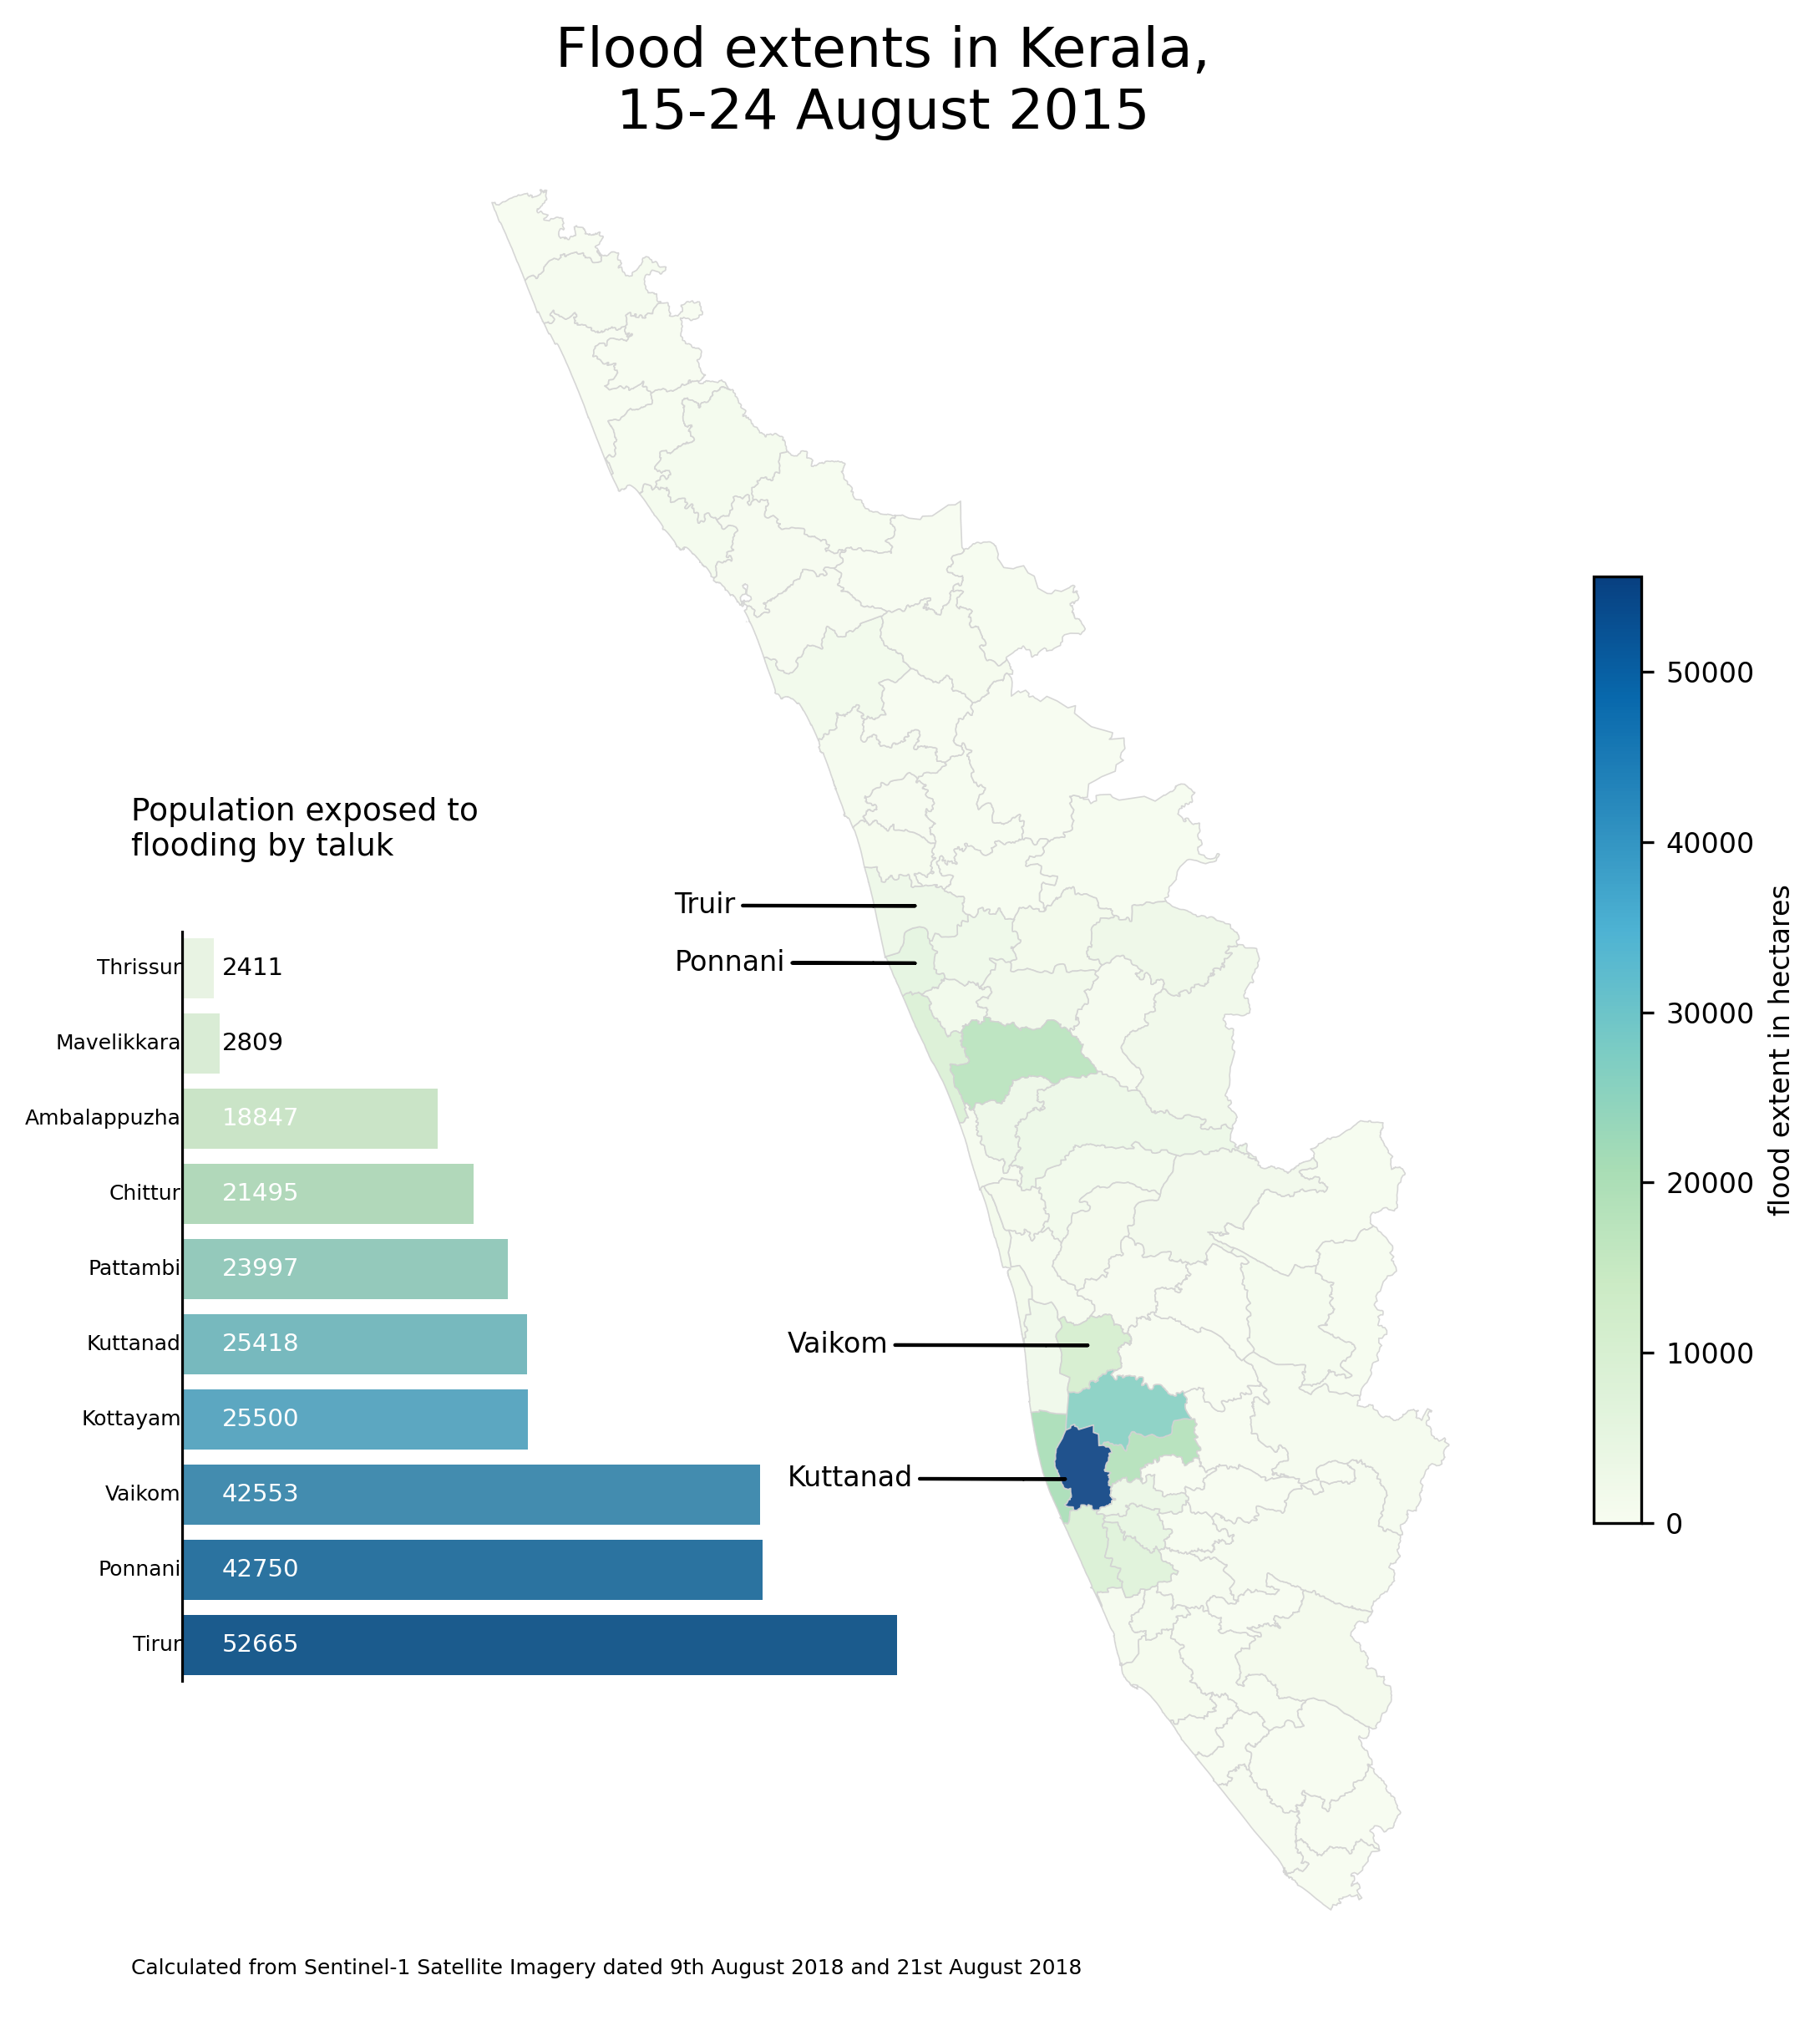

In [18]:
palette_name = "GnBu"
#cmap = load_cmap(palette_name, cmap_type="continuous")
plt.rcParams['font.size'] = '8'

fig, ax = plt.subplots(figsize=(10, 10), dpi=300)
ax.axis("off")
flooded_taluk_otsu.plot(ax=ax, column="count", cmap=palette_name, 
                        edgecolor="lightgrey", 
                        linewidth=0.4, 
                        alpha=0.9, 
                        legend = True, 
                        legend_kwds={'label': "flood extent in hectares", 'orientation': "vertical", 'shrink': 0.5}
                       )

#add annotations
ax.annotate('Truir',
xy=(75.99, 10.92), xytext=(75.35, 10.9), arrowprops=dict(facecolor='black', width = 0.05, headwidth = 0))
ax.annotate('Ponnani',
xy=(75.99, 10.77), xytext=(75.35, 10.75), arrowprops=dict(facecolor='black', width = 0.05, headwidth = 0))
ax.annotate('Vaikom',
xy=(76.45, 9.77), xytext=(75.65, 9.75), arrowprops=dict(facecolor='black', width = 0.05, headwidth = 0))
ax.annotate('Kuttanad',
xy=(76.39, 9.42), xytext=(75.65, 9.4), arrowprops=dict(facecolor='black', width = 0.05, headwidth = 0))

# barplot
mini_ax = ax.inset_axes(bounds=(0.22, 0.25, 0.3, 0.3), transform=fig.transFigure)
mini_ax.axis("off")
sns.barplot(
    data=top_10_taluks,
    y="name",
    x="label",
    palette='GnBu_r',
    ax=mini_ax,
    #hue="count",
    #legend=False,
)
mini_ax.axvline(x=0, color="black")
mini_ax.invert_yaxis()

for index, row in top_10_taluks.iterrows():
    x_pos = 3000 #row["count"] - 6 if row["count"] > 4 else row["count"] + 1
    y_pos = index
    color = "black" if index in [8, 9] else "white"
    mini_ax.text(x_pos, y_pos, row["label"], color=color, size=7, va="center")
    mini_ax.text(-10, y_pos, row["name"], color="black", size=6, va="center", ha = 'right')

fig.text(
    x=0.5, y=0.87, s="Flood extents in Kerala,\n15-24 August 2015", ha="center", size=16, #font=font
)
fig.text(x=0.2, y=0.58, s="Population exposed to\nflooding by taluk", size=9, #font=font
        )
fig_text(
    x=0.2,
    y=0.14,
    s="Calculated from Sentinel-1 Satellite Imagery dated 9th August 2018 and 21st August 2018",
    size=6
)

plt.savefig(
    "kerala_choropleth-map-with-barplot.jpeg",
    bbox_inches="tight",
    dpi=300,
)
    
plt.show()

In [209]:
#flooded_taluk_otsu.explore()

C:\Users\nw431\Miniconda3\envs\geopandas_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

